In [16]:
import numpy as np
import pandas as pd
import textdistance
from collections import Counter
import re
import matplotlib.pyplot as plt

#Preprocessing

###File Opening And Cleaning (change formate to utf-8)

In [17]:
words = []
with open('/content/drive/MyDrive/Oxford English Dictionary.txt','r',encoding='utf-8') as f:
    data = f.read()
    data = data.lower()
    words = re.findall('\w+', data)
    words +=words


In [ ]:
print(words[0:100])

['a', 'a', 'prefix', 'also', 'an', 'before', 'a', 'vowel', 'sound', 'not', 'without', 'amoral', 'greek', 'aa', 'abbr', '1', 'automobile', 'association', '2', 'alcoholics', 'anonymous', '3', 'anti', 'aircraft', 'aardvark', 'n', 'mammal', 'with', 'a', 'tubular', 'snout', 'and', 'a', 'long', 'tongue', 'feeding', 'on', 'termites', 'afrikaans', 'ab', 'prefix', 'off', 'away', 'from', 'abduct', 'latin', 'aback', 'adv', 'take', 'aback', 'surprise', 'disconcert', 'old', 'english', 'related', 'to', 'a2', 'abacus', 'n', 'pl', 'cuses', '1', 'frame', 'with', 'wires', 'along', 'which', 'beads', 'are', 'slid', 'for', 'calculating', '2', 'archit', 'flat', 'slab', 'on', 'top', 'of', 'a', 'capital', 'latin', 'from', 'greek', 'from', 'hebrew', 'abaft', 'naut', 'adv', 'in', 'the', 'stern', 'half', 'of', 'a', 'ship', 'prep', 'nearer', 'the', 'stern']


###make vocabulary

In [ ]:
len(words)

741352

In [ ]:
V = set(words)

### build the frequency of those words

In [19]:
word_freq_dict = Counter(words)

In [ ]:
word_freq_dict.most_common(10)

[('n', 29511),
 ('of', 27308),
 ('a', 25517),
 ('or', 22306),
 ('1', 16203),
 ('2', 16094),
 ('the', 13438),
 ('to', 13240),
 ('in', 12041),
 ('adj', 10212)]

# Data Visualization

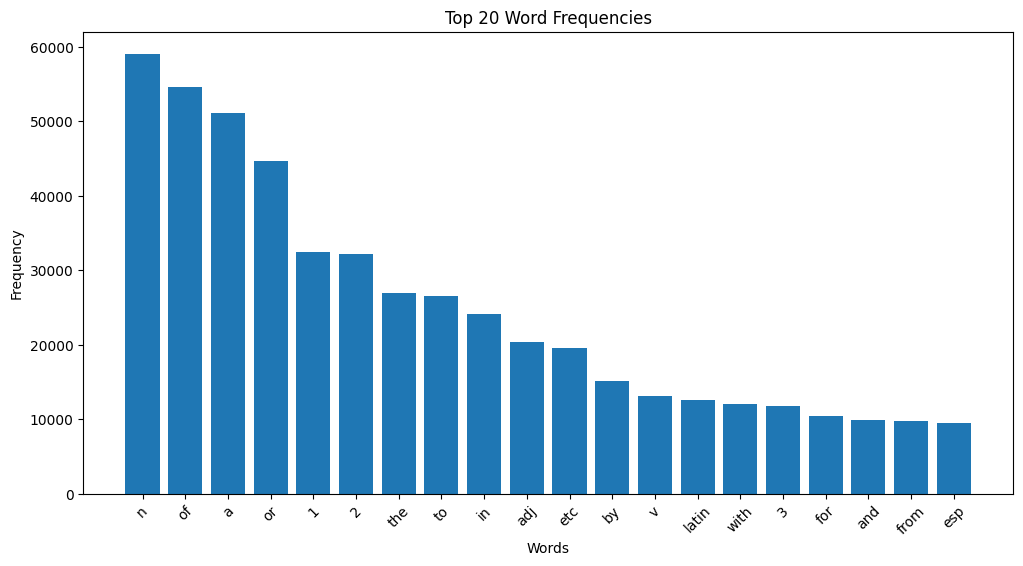

In [20]:
# Plotting Word Frequency Distribution
word_freq_df = pd.DataFrame.from_dict(word_freq_dict, orient='index', columns=['Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(word_freq_df.index[:20], word_freq_df['Frequency'][:20])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Word Frequencies')
plt.xticks(rotation=45)
plt.show()

#Analysis

###Relative Frequency of words
Now we want to get the probability of occurrence of each word, this equals the relative frequencies of the words:

The formula used to calculate the probability of a word in the provided code is:

Probability(word) = Frequency(word) / Total count of all words

In [21]:
Total_words_freq = sum(word_freq_dict.values())


probs = {}
for k in word_freq_dict.keys():
    probs[k] = word_freq_dict[k] / Total_words_freq

In [ ]:
print(probs)

{'a': 0.034419546989823996, 'prefix': 0.00011060872567956922, 'also': 0.0024023675662843023, 'an': 0.004248993730373696, 'before': 0.000369595010197585, 'vowel': 5.395547594125328e-05, 'sound': 0.0007405389072937012, 'not': 0.002645167208019942, 'without': 0.0006366746161067887, 'amoral': 2.697773797062664e-06, 'greek': 0.0027247515350332903, 'aa': 2.697773797062664e-06, 'abbr': 0.0010008740787102483, '1': 0.02185601441690317, 'automobile': 6.74443449265666e-06, 'association': 8.228210081041124e-05, '2': 0.021708985744963258, 'alcoholics': 1.348886898531332e-06, 'anonymous': 8.093321391187992e-06, '3': 0.007904477225393605, 'anti': 3.1024398666220634e-05, 'aircraft': 0.0002819173617930484, 'aardvark': 1.348886898531332e-06, 'n': 0.03980700126255814, 'mammal': 8.228210081041124e-05, 'with': 0.008164812396810153, 'tubular': 1.8884416579438646e-05, 'snout': 2.5628851072095308e-05, 'and': 0.006687781242918344, 'long': 0.000674443449265666, 'tongue': 7.014211872362926e-05, 'feeding': 4.1815

###Finding Similar Words

In [22]:
def autocorrect(words): # Hel is
    words = words.lower()
    if words in probs:
        print('the word is already there', words)
    else:
        similarities = [1 - textdistance.Jaccard(qval=2).distance(v, words) for v in word_freq_dict]
        df = pd.DataFrame.from_dict(probs, orient='index').reset_index()
        df.columns = ['Word', 'Prob']
        df['Similarity'] = similarities
        output = df.sort_values(['Similarity','Prob'],ascending=False).head(10)
        return(output)


#Prediction in Real Time



In [30]:
input_word = "hmm"
output = autocorrect(input_word)
output

,Word,Prob,Similarity
11670,mm,0.000058,0.500000
29818,hm,0.000003,0.500000
38238,ohm,0.000005,0.333333
29819,hmg,0.000003,0.333333
29820,hmi,0.000003,0.333333
29822,hms,0.000003,0.333333
36503,mme,0.000001,0.333333
29823,hmso,0.000003,0.250000
35750,ohms,0.000003,0.250000
4356,ammo,0.000001,0.250000


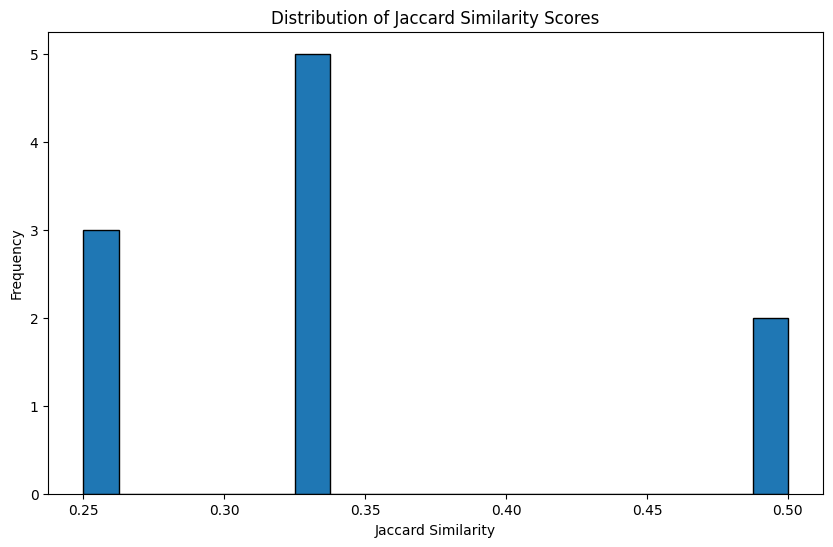

In [31]:
# Plotting Jaccard Similarity Distribution
plt.figure(figsize=(10, 6))
plt.hist(output['Similarity'], bins=20, edgecolor='black')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Jaccard Similarity Scores')
plt.show()